<a href="https://colab.research.google.com/github/TalCordova/TensorFlow_Course/blob/main/03_convolutional_neural_networks_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images are from the food 101 dataset.

However we modified it to only use two classes (pizza & steak) using the image data modification notebook.

In [1]:
import zipfile
import wget

url =  'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
fileName = wget.download(url)

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

A very crucail step at the beginning of any machine learning project is becoming one with the data.

And for computer vision, this usually means visualizing many samples of your dataset.

In [4]:
import os
os.listdir("pizza_steak")

['test', 'train']

In [5]:
os.listdir("pizza_steak/train/")

['pizza', 'steak']

In [6]:
os.listdir("pizza_steak/train/steak")

['1000205.jpg',
 '100135.jpg',
 '101312.jpg',
 '1021458.jpg',
 '1032846.jpg',
 '10380.jpg',
 '1049459.jpg',
 '1053665.jpg',
 '1068516.jpg',
 '1068975.jpg',
 '1081258.jpg',
 '1090122.jpg',
 '1093966.jpg',
 '1098844.jpg',
 '1100074.jpg',
 '1105280.jpg',
 '1117936.jpg',
 '1126126.jpg',
 '114601.jpg',
 '1147047.jpg',
 '1147883.jpg',
 '1155665.jpg',
 '1163977.jpg',
 '1190233.jpg',
 '1208405.jpg',
 '1209120.jpg',
 '1212161.jpg',
 '1213988.jpg',
 '1219039.jpg',
 '1225762.jpg',
 '1230968.jpg',
 '1236155.jpg',
 '1241193.jpg',
 '1248337.jpg',
 '1257104.jpg',
 '126345.jpg',
 '1264050.jpg',
 '1264154.jpg',
 '1264858.jpg',
 '127029.jpg',
 '1289900.jpg',
 '1290362.jpg',
 '1295457.jpg',
 '1312841.jpg',
 '1313316.jpg',
 '1324791.jpg',
 '1327567.jpg',
 '1327667.jpg',
 '1333055.jpg',
 '1334054.jpg',
 '1335556.jpg',
 '1337814.jpg',
 '1340977.jpg',
 '1343209.jpg',
 '134369.jpg',
 '1344105.jpg',
 '134598.jpg',
 '1346387.jpg',
 '1348047.jpg',
 '1351372.jpg',
 '1362989.jpg',
 '1367035.jpg',
 '1371177.jpg',
 

In [7]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# Another way to find put how many images in a file
num_steaks_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steaks_images_train

750

To visualize our images, first let's get the class names programmatically.

In [9]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from the sub-directories
print(class_names)

['pizza' 'steak']


In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (512, 512, 3)


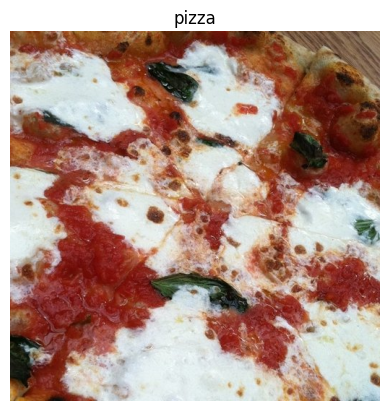

In [11]:
# View a random image from the train dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [12]:
# The images that we've imported and plotted are actually giant arrays\tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[132,  63,  24],
        [139,  71,  32],
        [134,  66,  29],
        ...,
        [140, 115,  84],
        [134, 109,  78],
        [136, 111,  80]],

       [[130,  61,  22],
        [134,  66,  27],
        [132,  64,  27],
        ...,
        [147, 122,  91],
        [143, 118,  87],
        [138, 113,  82]],

       [[137,  68,  27],
        [133,  66,  24],
        [129,  61,  22],
        ...,
        [146, 121,  90],
        [149, 124,  93],
        [146, 121,  90]],

       ...,

       [[196, 161,  93],
        [193, 158,  92],
        [182, 143,  84],
        ...,
        [170, 198, 212],
        [179, 205, 220],
        [171, 197, 212]],

       [[182, 148,  77],
        [180, 145,  77],
        [174, 136,  74],
        ...,
        [160, 188, 202],
        [169, 195, 210],
        [166, 192, 207]],

       [[162, 128,  56],
        [164, 130,  59],
        [163, 125,  63],
        ...,
        [159, 187, 20

In [13]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [14]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.51764706, 0.24705882, 0.09411765],
        [0.54509804, 0.27843137, 0.1254902 ],
        [0.5254902 , 0.25882353, 0.11372549],
        ...,
        [0.54901961, 0.45098039, 0.32941176],
        [0.5254902 , 0.42745098, 0.30588235],
        [0.53333333, 0.43529412, 0.31372549]],

       [[0.50980392, 0.23921569, 0.08627451],
        [0.5254902 , 0.25882353, 0.10588235],
        [0.51764706, 0.25098039, 0.10588235],
        ...,
        [0.57647059, 0.47843137, 0.35686275],
        [0.56078431, 0.4627451 , 0.34117647],
        [0.54117647, 0.44313725, 0.32156863]],

       [[0.5372549 , 0.26666667, 0.10588235],
        [0.52156863, 0.25882353, 0.09411765],
        [0.50588235, 0.23921569, 0.08627451],
        ...,
        [0.57254902, 0.4745098 , 0.35294118],
        [0.58431373, 0.48627451, 0.36470588],
        [0.57254902, 0.4745098 , 0.35294118]],

       ...,

       [[0.76862745, 0.63137255, 0.36470588],
        [0.75686275, 0.61960784, 0.36078431],
        [0.71372549, 0

## An end-to-end example

Let's build a convolutional neural network to find patters in our images, more specifically we need a way to:

* Learn our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalizing)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directoris and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
with tf.device("/gpu:0"):
    history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 416ms/step - loss: 0.5757 - accuracy: 0.6767 - val_loss: 0.3708 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 0.4243 - accuracy: 0.8120 - val_loss: 0.3234 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 12s 248ms/step - loss: 0.3834 - accuracy: 0.8260 - val_loss: 0.3426 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.3498 - accuracy: 0.8520 - val_loss: 0.3208 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3048 - accuracy: 0.8813 - val_loss: 0.3205 - val_accuracy: 0.8660


In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Use the same model as before

Let's replicate the model we built in a previous section to see if it works with our image data.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model to replicate the TensorFlow playgorund model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
with tf.device("/gpu:0"):
    history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 125ms/step - loss: 1.6426 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than CNN (model_1), model_2 preforms terribly... let's try and improve it

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
with tf.device("/gpu:0"):
    history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 173ms/step - loss: 5.3311 - accuracy: 0.5893 - val_loss: 0.5212 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6909 - accuracy: 0.7013 - val_loss: 0.6346 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.5996 - accuracy: 0.7307 - val_loss: 0.8204 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6001 - accuracy: 0.7253 - val_loss: 0.8034 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 8s 165ms/step - loss: 0.5393 - accuracy: 0.7647 - val_loss: 0.4411 - val_accuracy: 0.7800


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down:

1. Become one with the data.
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Create a model (start with a baseline.
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline).
7. Repaet until satisfied (experiment, experiment, experiment).

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


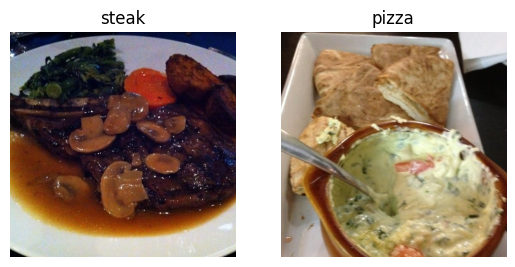

In [21]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
staek_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define the directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next steps is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at a one time, a model might only look at 32 at once.

It does this for a couple of reason:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being to learn very well.

Why 32?

Because 32 is good for your health...

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [24]:
# Load in our image data from directories and turen them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory od images
                                               target_size = (224, 224), # Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32) # size of mini-batches to load data into
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a training data catch
images, labels = train_data.next() # get the next natch of images\labels in train data
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there?
len(train_data)

47

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline).

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [29]:
# Make the creating of our model a littke easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline, a three layer convolutional network)
model_4 = Sequential([
    Conv2D(filters = 10, # filters is the number of sliding windows going across the input (higher is more complex)
           kernel_size = 3, # the size of the sliding window going across the input
           strides = 1, # the size of the step the sliding window takes across an input
           padding = "valid", # if "same", output shape is same as input shape, if "valid" output gets compressed
           activation = "relu",
           input_shape = (224,224,3)), # input layer - specify input shape
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the length of training of test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and samples
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),) 

Epoch 1/5
47/47 [==============================] - 13s 275ms/step - loss: 1.0341 - accuracy: 0.6900 - val_loss: 0.4347 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4301 - accuracy: 0.8153 - val_loss: 0.3855 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 13s 276ms/step - loss: 0.3249 - accuracy: 0.8800 - val_loss: 0.3705 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 12s 260ms/step - loss: 0.1728 - accuracy: 0.9440 - val_loss: 0.4574 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 13s 274ms/step - loss: 0.0781 - accuracy: 0.9760 - val_loss: 0.5913 - val_accuracy: 0.7600


### 5. Evaluating the model

It looks like our model is learning something, let's evaluate our model.

<AxesSubplot:>

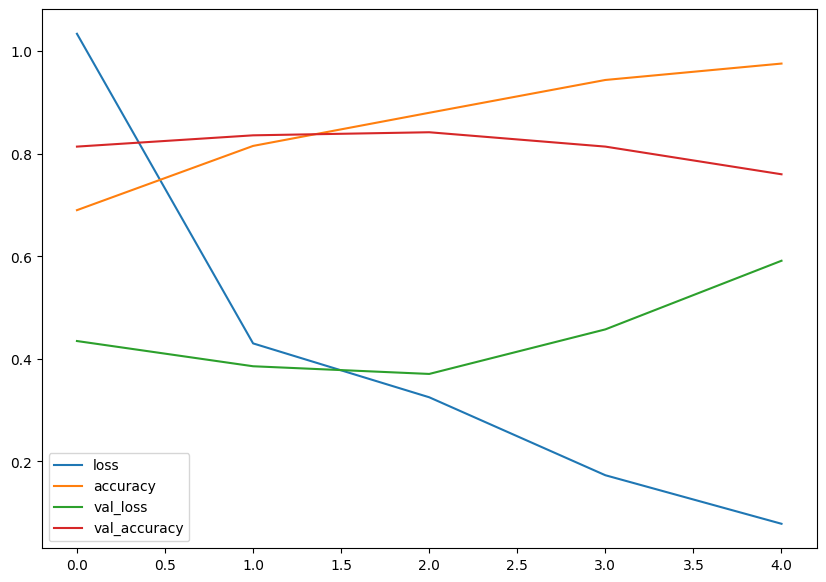

In [34]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [35]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot Loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

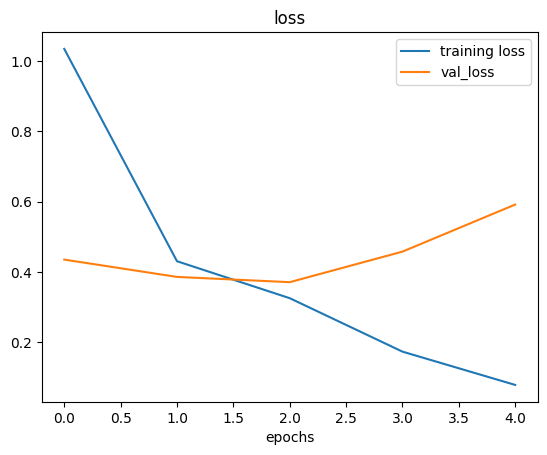

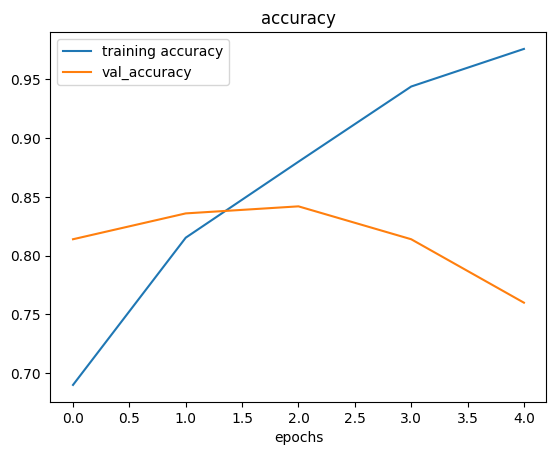

In [36]:
# Chceck out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number if conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regularization (such as MaxPool2D)
* Add more data...

In [37]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [38]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [39]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 0.6701 - accuracy: 0.6113 - val_loss: 0.5565 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.5011 - accuracy: 0.7693 - val_loss: 0.3988 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4299 - accuracy: 0.8067 - val_loss: 0.3690 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4048 - accuracy: 0.8220 - val_loss: 0.3462 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3844 - accuracy: 0.8293 - val_loss: 0.3390 - val_accuracy: 0.8540


In [41]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

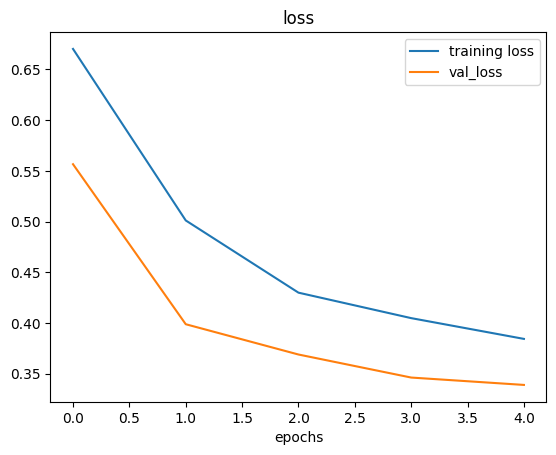

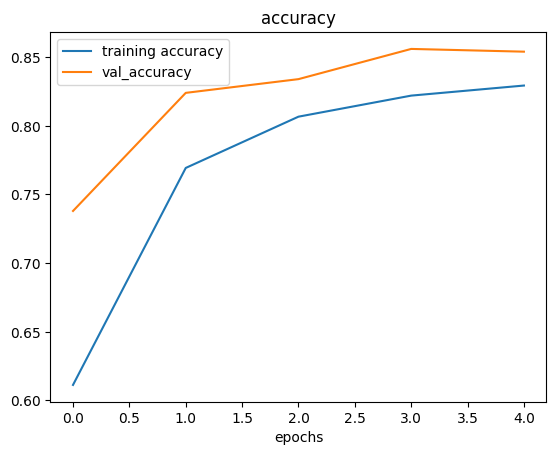

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [43]:
# Create ImgaeDataGenerator training instance with data augmentation
training_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                                rotation_range = 0.2, # how much do you want to rotate an image?
                                                shear_range = 0.2, # how much do you want to shear an image
                                                zoom_range = 0.2, # zoom in randomly on an image
                                                width_shift_range = 0.2, # move around an image horizontally
                                                height_shift_range = 0.2, # move around an image vertically
                                                horizontal_flip = True) # do you want to flip an image?

# Create ImgaeDataGenerator without data augmantation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

Let's write some code to visualize data augmentation

In [44]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = training_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224,224),
                                                                      batch_size = 32,
                                                                      class_mode = "binary",
                                                                      shuffle = False) # for demonstariton purpose only

# Crate non-augmented train data_batches
print("Non augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


Finally.. let's visualize some augmented data

In [45]:
# Get some augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented

Showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

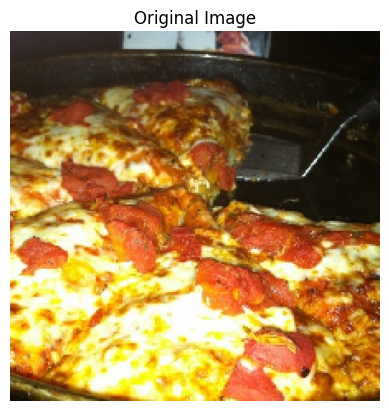

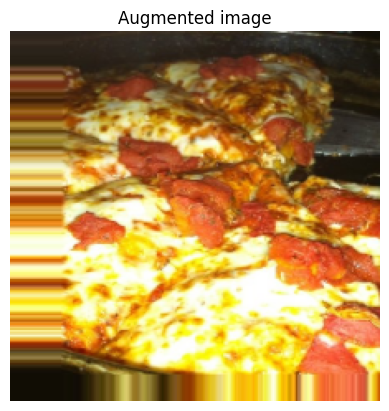

In [46]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [47]:
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Complie the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented train data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 448ms/step - loss: 0.7036 - accuracy: 0.4747 - val_loss: 0.6826 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 21s 440ms/step - loss: 0.6835 - accuracy: 0.5840 - val_loss: 0.6251 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 21s 440ms/step - loss: 0.6611 - accuracy: 0.6673 - val_loss: 0.6472 - val_accuracy: 0.5960
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6565 - accuracy: 0.6407 - val_loss: 0.5895 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6146 - accuracy: 0.6853 - val_loss: 0.5211 - val_accuracy: 0.7740


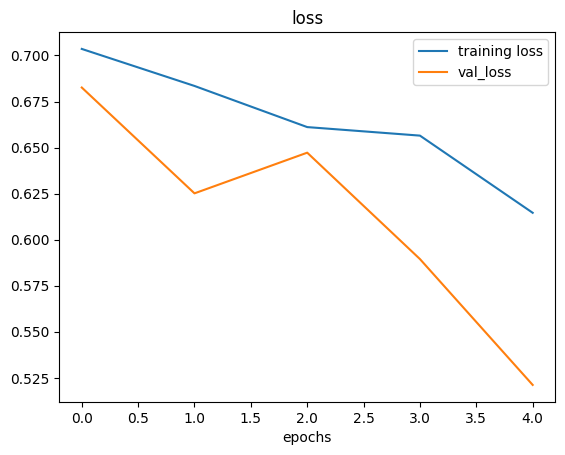

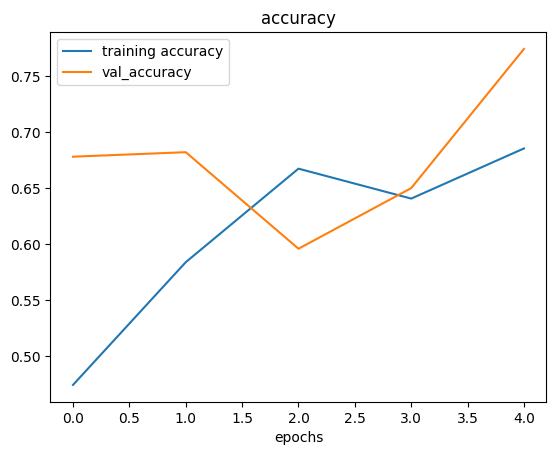

In [48]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our training and augmented training data and train another model (the same as before) and see what happens.

In [49]:
# Import data and augment it from training directory
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                                  target_size = (224, 224),
                                                                  batch_size = 32,
                                                                  class_mode = "binary",
                                                                  shuffle = True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 & model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5802 - accuracy: 0.7033 - val_loss: 0.4572 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4556 - accuracy: 0.7827 - val_loss: 0.4020 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.4107 - accuracy: 0.8127 - val_loss: 0.3780 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.3980 - accuracy: 0.8347 - val_loss: 0.3490 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3752 - accuracy: 0.8300 - val_loss: 0.3315 - val_accuracy: 0.8500


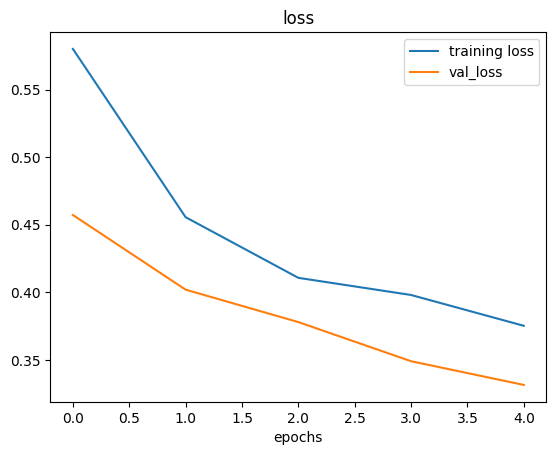

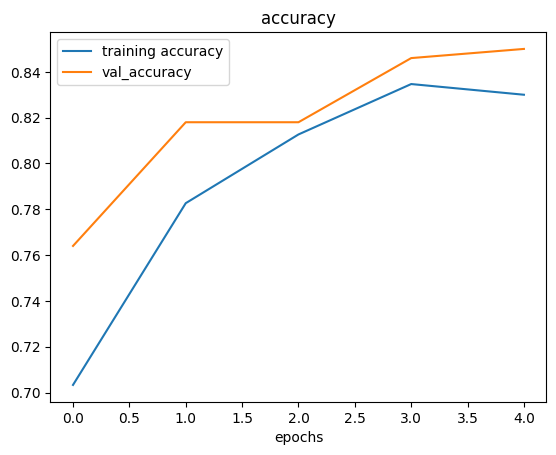

In [51]:
# Plot the loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there a few things we could try to continue to improve our model:

* Increase the numbder of model layers (e.g. more `Conv2D`/`MaxPool2D` layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Unse **transfer learning** to leverage what another image model has learn and adjust it to our own use case.

## Making a prediction with our trained model on our own custom data

In [52]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


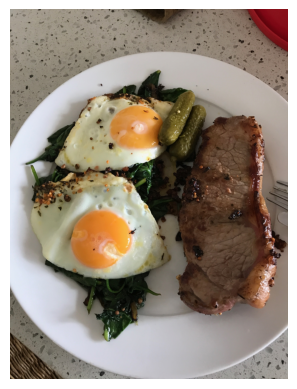

In [54]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [55]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [56]:
expanded_steak = tf.expand_dims(steak, axis = 0)

In [57]:
# Create a function to import an image and resize it to be able to be used in our model
def load_and_prep_image(filename, img_shape = 224):
    """
    Reads an image from filename, turen it into a tensor and reshapes it to (ing_shape, img_shape, color_channels),
    """
    # Read the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    # Rescale the image (get all valued between 0 and 1)
    img = img/255.
    return img

In [58]:
# Load in and preprocess our image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [59]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

1/1 [==============================] - 0s 74ms/step


array([[0.8060757]], dtype=float32)

Looks like our custom image is being put through our model. however, it currently otputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [60]:
# Remind ourselves of the class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [61]:
# We can index the predicted calss by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [62]:
def pred_and_plot(model, filename, class_name = class_names):
    """
    Imports an image located at fileneame, makes a predictiob with model and plots the image with the predicted class as title
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Get the predicred class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted calss
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 14ms/step


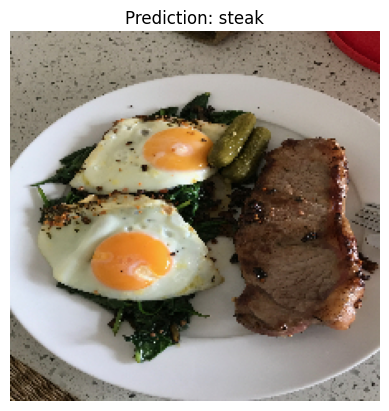

In [63]:
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza

1/1 [==============================] - 0s 14ms/step


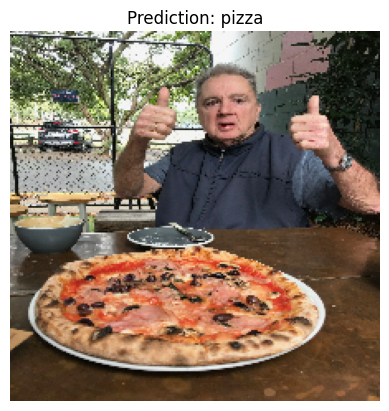

In [64]:
# Get another test custom image and make prediction
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to stepthings up a notch with 10 classes of food (multiclass classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with the baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [65]:
import zipfile
import wget

url =  'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
fileName = wget.download(url)

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [68]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [70]:
# Let's get the path names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


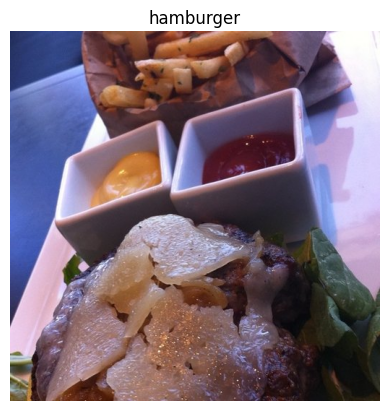

In [100]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [103]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data from directories and turn it to batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size =(224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about CNN explainer website... how about we just take their model (also on 10 classes) and use it for our purposes

In [107]:
# Create the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### 4. Fit the model

In [109]:
# Fit the model
with tf.device("/gpu:0"):
    history_8 = model_8.fit(train_data, # now it's 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 278ms/step - loss: 2.0621 - accuracy: 0.2599 - val_loss: 2.0234 - val_accuracy: 0.2616
Epoch 2/5
235/235 [==============================] - 68s 288ms/step - loss: 1.7822 - accuracy: 0.3905 - val_loss: 1.9623 - val_accuracy: 0.3048
Epoch 3/5
235/235 [==============================] - 72s 304ms/step - loss: 1.2187 - accuracy: 0.5983 - val_loss: 2.1709 - val_accuracy: 0.2760
Epoch 4/5
235/235 [==============================] - 63s 266ms/step - loss: 0.5663 - accuracy: 0.8208 - val_loss: 3.0097 - val_accuracy: 0.2812
Epoch 5/5
235/235 [==============================] - 66s 283ms/step - loss: 0.2075 - accuracy: 0.9403 - val_loss: 4.1017 - val_accuracy: 0.2608


### 5. Evaluate the model

In [110]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 9s 114ms/step - loss: 4.1017 - accuracy: 0.2608


[4.101698875427246, 0.26080000400543213]

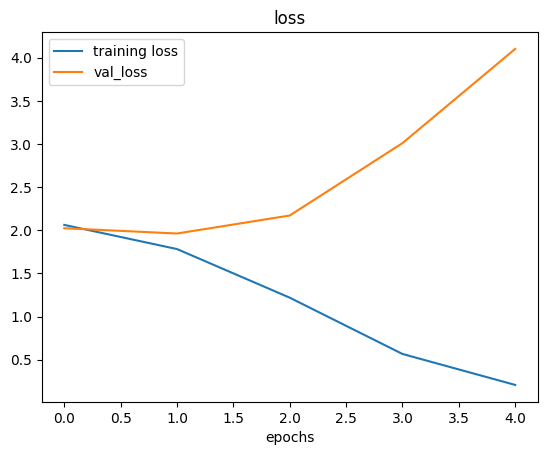

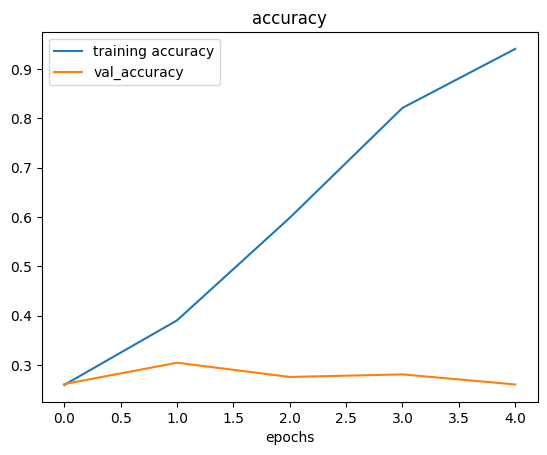

In [111]:
# Check out model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and preforms poorly in the test dataset.

### 6. Adjust the model's hyperparameters (to beat the baseline/reduce overfitting).

Due to its preformance on the training data, it's clear the model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try to and fix overffiting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer data** - transfer learning leverages the patterns aanother model has learned on similar data to your own and allows you to use those patterns on your dataset

In [115]:
# How about we try to simplify our model first
# Let's remove two convolution layers

# Build the model
model_9 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [116]:
# Fit the model with 2x conv layer
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 202ms/step - loss: 2.1091 - accuracy: 0.2543 - val_loss: 1.9350 - val_accuracy: 0.3184
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.7918 - accuracy: 0.3932 - val_loss: 1.8582 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 43s 181ms/step - loss: 1.5232 - accuracy: 0.4972 - val_loss: 1.9246 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 1.1141 - accuracy: 0.6480 - val_loss: 2.0354 - val_accuracy: 0.3280
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.6360 - accuracy: 0.8177 - val_loss: 2.3894 - val_accuracy: 0.3104


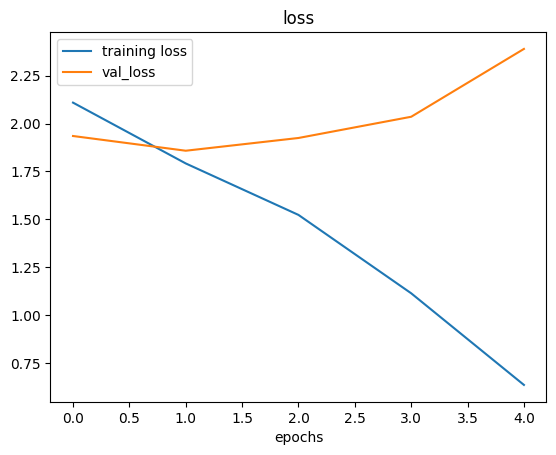

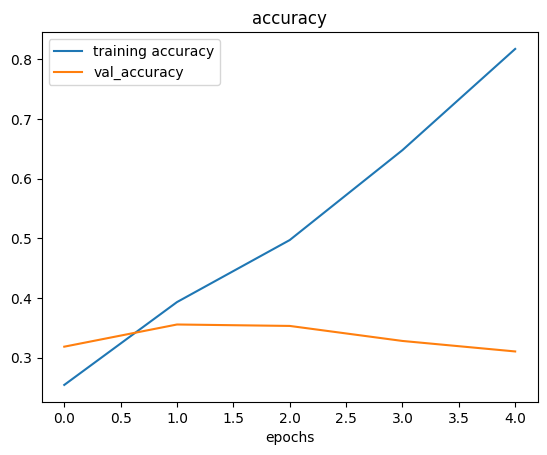

In [117]:
# Check out the loss curves for model_9
plot_loss_curves(history_9)

In [118]:
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [119]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Looks like the "simplifying the model" experiment didn't work... the accuracy went down and the overfitting continued.

How about we try data augmentation?

### Try to reduce overfitting with data augmentaion

Let's try and improve our model's results by using augmented training data...

Ideally we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [126]:
# Create an augmented data instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size = (224,224),
                                                                batch_size = 32,
                                                                class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [132]:
# Let's create another model, this time we'll fit it on the augmented training data of 10 classses

model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model using the same setup as previous model
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

with tf.device("/gpu:0"):
    history_10 = model_10.fit(train_data_augmented,
                 epochs = 5,
                 steps_per_epoch = len(train_data_augmented),
                 validation_data = test_data,
                 validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 527ms/step - loss: 2.2363 - accuracy: 0.1685 - val_loss: 2.1657 - val_accuracy: 0.2192
Epoch 2/5
235/235 [==============================] - 124s 529ms/step - loss: 2.1232 - accuracy: 0.2311 - val_loss: 1.9976 - val_accuracy: 0.2880
Epoch 3/5
235/235 [==============================] - 123s 522ms/step - loss: 2.0658 - accuracy: 0.2621 - val_loss: 1.9809 - val_accuracy: 0.3028
Epoch 4/5
235/235 [==============================] - 124s 529ms/step - loss: 1.9944 - accuracy: 0.3077 - val_loss: 1.9130 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 122s 520ms/step - loss: 1.9595 - accuracy: 0.3163 - val_loss: 1.8406 - val_accuracy: 0.3504


In [129]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 4.1017 - accuracy: 0.2608


[4.1016998291015625, 0.26080000400543213]

In [130]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.7901 - accuracy: 0.3772


[1.7900782823562622, 0.37720000743865967]

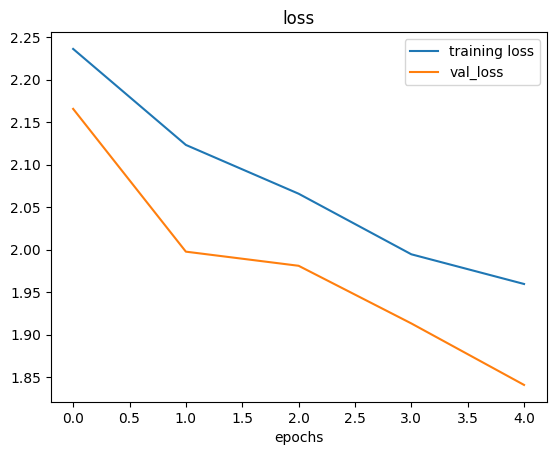

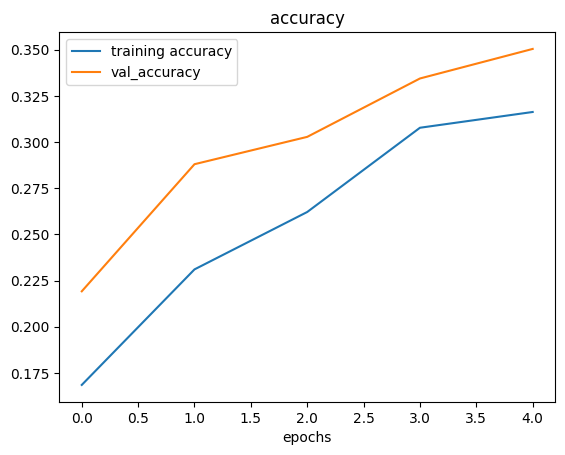

In [133]:
plot_loss_curves(history_10)

Whoa! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we ,might see further improvements.

### 7. Repeat until satisfied

We could keep going... continually bring our loss curves closer together and trying to improve the validation\test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increase layers\hidden units)
- adjust learning rate
- try different methods of data augmentation (adjust the hyperpaprameters in our ImagaeDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our custom images!

In [135]:
# Remind ourselves if the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [141]:
# Reconfig pred_and_plot function to work with multiclass prediction
def pred_and_plot(model, filename, class_name = class_names):
    """
    Imports an image located at fileneame, makes a predictiob with model and plots the image with the predicted class as title
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Add in logic for multiclass & get pred class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted calss
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 14ms/step


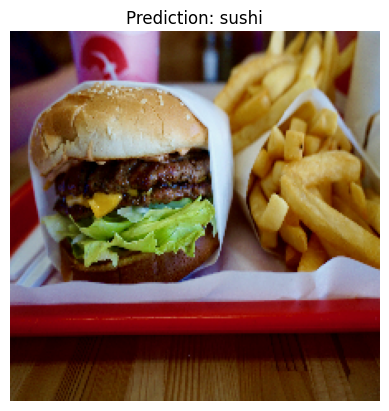

In [145]:
# Download some custom images

# Make a prediction using model_10
pred_and_plot(model_10, filename = "03-hamburger.jpeg", class_name = class_names)

Looks like our model didn't preform very well on our custom images, but this is becasue it only achieved ~39% accuracy on the test data. So we can expect it to function poorly on other unseen data.

### Saving and loading our model

In [147]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [150]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.8406 - accuracy: 0.3504


[1.8406434059143066, 0.35040000081062317]

In [151]:
model_10.evaluate(test_data)

79/79 [==============================] - 9s 118ms/step - loss: 1.8406 - accuracy: 0.3504


[1.8406437635421753, 0.35040000081062317]

In [ ]:
# Visualize, visualize, visualize
